SyntaxError: invalid syntax (4181567605.py, line 1)

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

directory = 'C:/Users/urenn/Downloads/cbb.csv'

df = pd.read_csv(directory)


df.info()

df = df.sort_values(by=[ 'YEAR', 'TEAM'], ascending=[False, True ])

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        3523 non-null   object 
 1   CONF        3523 non-null   object 
 2   G           3523 non-null   int64  
 3   W           3523 non-null   int64  
 4   ADJOE       3523 non-null   float64
 5   ADJDE       3523 non-null   float64
 6   BARTHAG     3523 non-null   float64
 7   EFG_O       3523 non-null   float64
 8   EFG_D       3523 non-null   float64
 9   TOR         3523 non-null   float64
 10  TORD        3523 non-null   float64
 11  ORB         3523 non-null   float64
 12  DRB         3523 non-null   float64
 13  FTR         3523 non-null   float64
 14  FTRD        3523 non-null   float64
 15  2P_O        3523 non-null   float64
 16  2P_D        3523 non-null   float64
 17  3P_O        3523 non-null   float64
 18  3P_D        3523 non-null   float64
 19  ADJ_T       3523 non-null  

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
3317,Abilene Christian,WAC,26,13,104.5,106.5,0.4435,49.2,56.5,17.3,...,45.6,48.1,56.2,34.3,38.1,69.0,-10.2,NaN,NaN,2023
3342,Air Force,MWC,32,14,105.4,102.9,0.5665,54.2,49.3,19.0,...,35.2,54.8,51.9,35.6,29.3,63.0,-9.4,NaN,NaN,2023
3487,Akron,MAC,31,22,108.6,103.0,0.6479,51.9,49.7,16.6,...,28.0,51.5,48.1,35.0,35.0,65.2,-4.9,NaN,NaN,2023
3162,Alabama,SEC,37,31,116.1,89.0,0.9548,52.1,41.3,18.7,...,32.6,53.8,40.8,33.5,28.3,72.6,10.2,S16,1.0,2023
3374,Alabama A&M,SWAC,30,15,95.8,107.4,0.2121,48.6,49.4,21.4,...,41.8,46.9,48.5,34.7,33.8,68.3,-14.1,NaN,NaN,2023


In [27]:
#Cleaning the Data 

#check for missing values 
missing_values = df.isna().any()
print(missing_values[missing_values==True])

#postseason and seed have missing values
postseason_na = df['POSTSEASON'].isna()
seed_na = df['SEED'].isna()

#update the missing values 
df.loc[postseason_na, 'POSTSEASON'] = 'Did not qualify'
df.loc[seed_na, 'SEED'] = 'Did not qualify'
df['SEED']=df['SEED'].astype(str) # has string and integer values

df.head()


#change all the conference names
#did not change sec, acc, ivy, swac
df['CONF'] = df['CONF'].replace('A10', 'Atlantic 10')
df['CONF'] = df['CONF'].replace('AE', 'America East')
df['CONF'] = df['CONF'].replace('Amer', 'American Athletic')
df['CONF']=df['CONF'].replace('ASun', 'Atlantic Sun' )
df['CONF'] = df['CONF'].replace('B10', 'Big Ten')
df['CONF'] = df['CONF'].replace('B12', 'Big 12')
df['CONF'] = df['CONF'].replace('BE', 'Big East')
df['CONF'] = df['CONF'].replace('BSky', 'Big Sky')
df['CONF'] = df['CONF'].replace('BSth', 'Big South')
df['CONF'] = df['CONF'].replace('BW', 'Big West')
df['CONF'] = df['CONF'].replace('CAA', 'Colonial Athletic')
df['CONF'] = df['CONF'].replace('CUSA', 'Conference USA')
df['CONF'] = df['CONF'].replace('Horz', 'Horizon')
df['CONF'] = df['CONF'].replace('MAAC', 'Metro Atlantic')
df['CONF'] = df['CONF'].replace('MEAC', 'Mid Eastern')
df['CONF'] = df['CONF'].replace('MWC', 'Mountain West')
df['CONF'] = df['CONF'].replace('MVC', 'Missouri Valley')
df['CONF'] = df['CONF'].replace('NEC', 'Northeast')
df['CONF'] = df['CONF'].replace('OVC', 'Ohio Valley')
df['CONF'] = df['CONF'].replace('P12', 'Pac 12')
df['CONF'] = df['CONF'].replace('Pat', 'Patriot')
df['CONF'] = df['CONF'].replace('SB', 'Sun Belt')
df['CONF'] = df['CONF'].replace('SC', 'Southern')
df['CONF'] = df['CONF'].replace('Slnd', 'Southland')
df['CONF'] = df['CONF'].replace('Sum', 'Summit')
df['CONF'] = df['CONF'].replace('WAC', 'Western Athletic')
df['CONF'] = df['CONF'].replace('WCC', 'West Coast')


POSTSEASON    True
SEED          True
dtype: bool


In [28]:
#filter the conferences 

atl_ten = df[df['CONF']=='Atlantic 10']
asun = df[df['CONF'] == 'Atlantic Sun']
swac = df[df['CONF'] == 'SWAC']
amer_east=df[df['CONF'] == 'America East']


In [29]:
def plot_efficiency(data, year, conference):
    """
    Plot Offensive Efficiency vs. Defensive Efficiency for a given year and conference.

    Parameters:
    - data: DataFrame containing the data.
    - year: Specific year to filter and plot.
    - conference: Name of the conference. Default is 'SEC'.
    """

    # Filter data
    conf_data = data[data['CONF'] == conference]
    year_data = conf_data[conf_data['YEAR'] == year]

    # Create scatter plot
    plt.figure(figsize=(12, 10))
    sns.scatterplot(data=year_data, x='ADJOE', y='ADJDE', hue='YEAR', s=100)

    for i, team in enumerate(year_data['TEAM']):
        plt.text(year_data['ADJOE'].iloc[i], year_data['ADJDE'].iloc[i], team, fontsize=10, ha='right')

    # Labeling and displaying the plot
    plt.xlabel('Offensive Efficiency (points scored per 100 possessions)')
    plt.ylabel('Defensive Efficiency (points allowed per 100 possessions)')
    plt.title(f'Offensive Efficiency vs Defensive Efficiency for {conference} Teams ({year})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


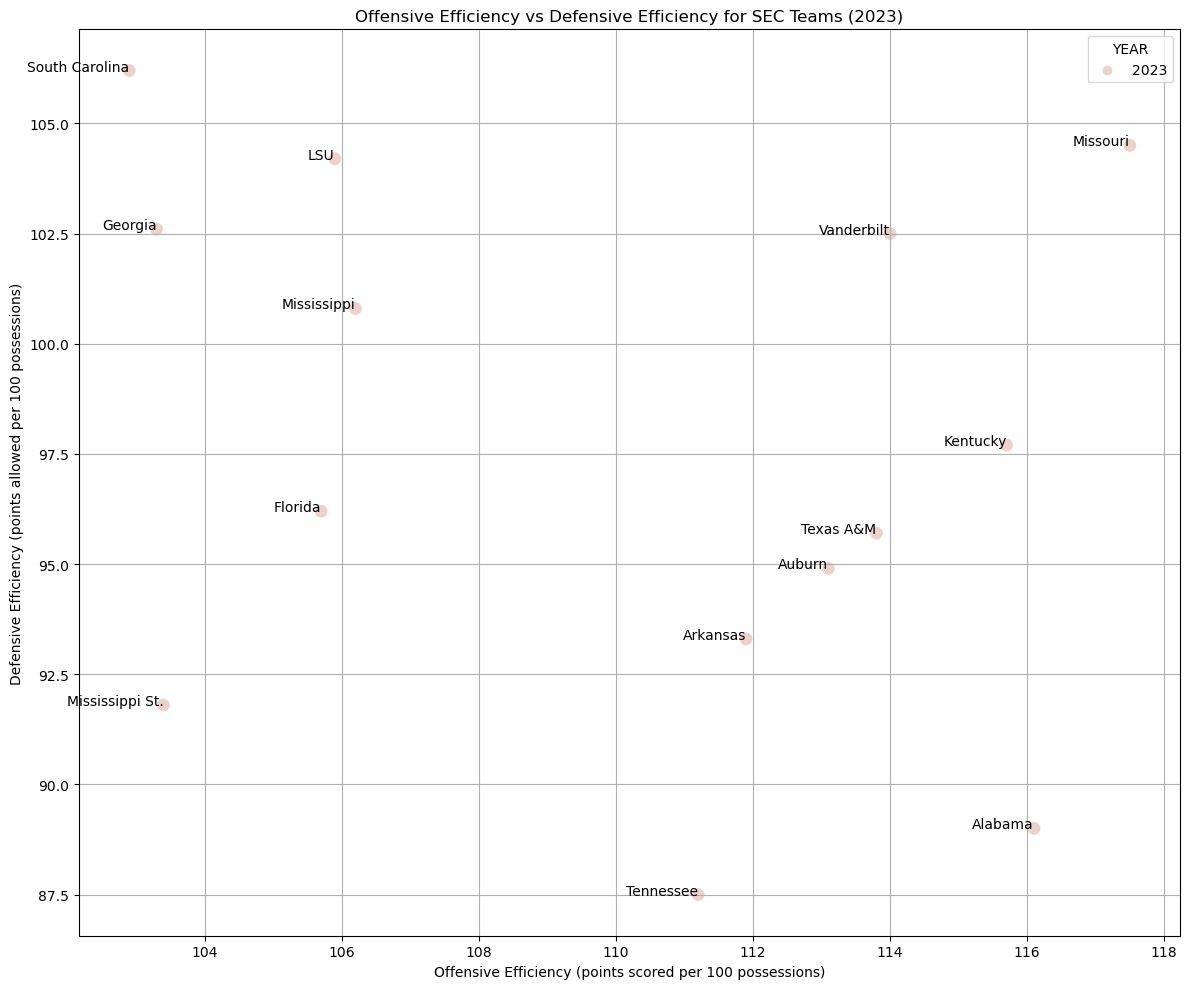

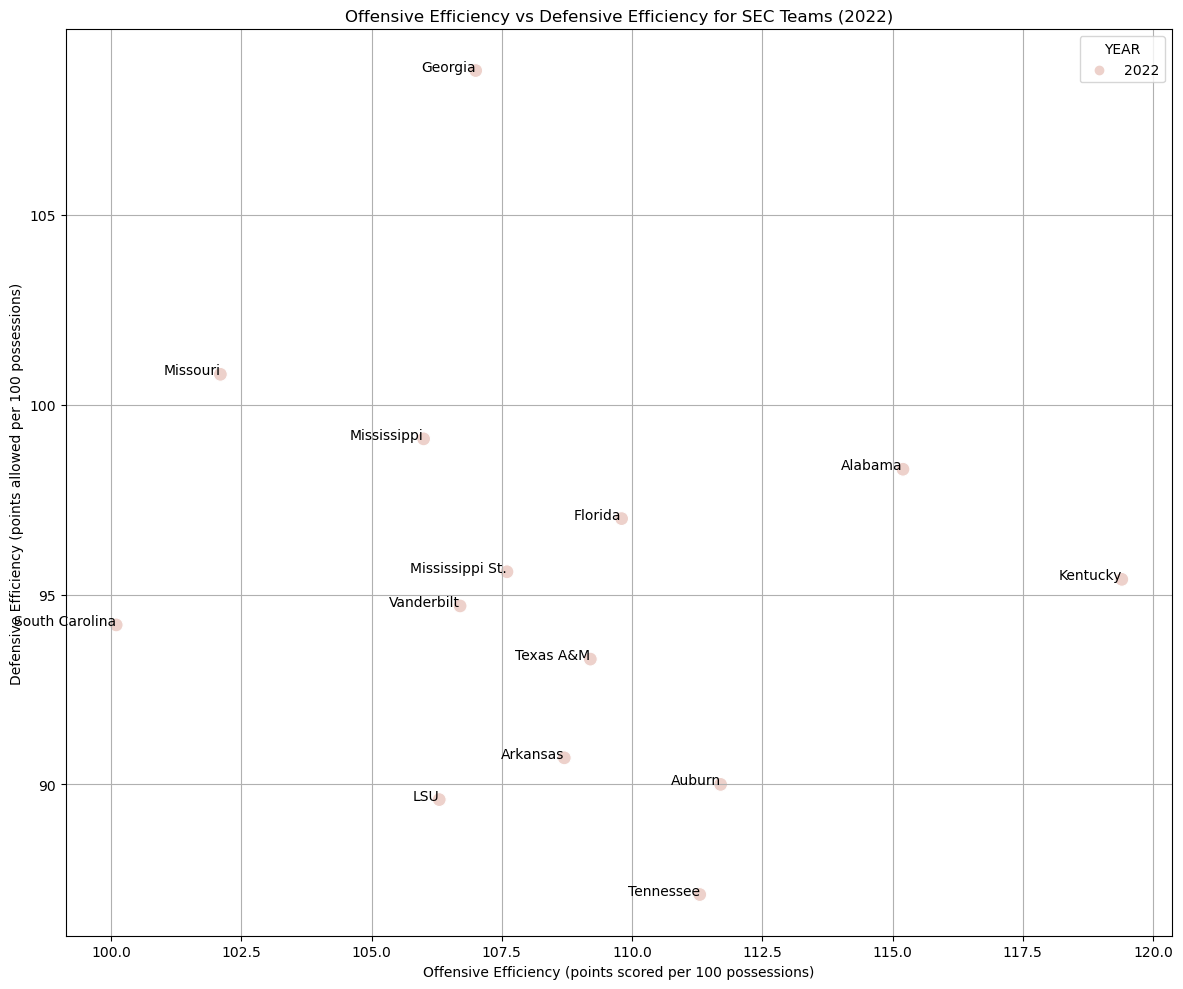

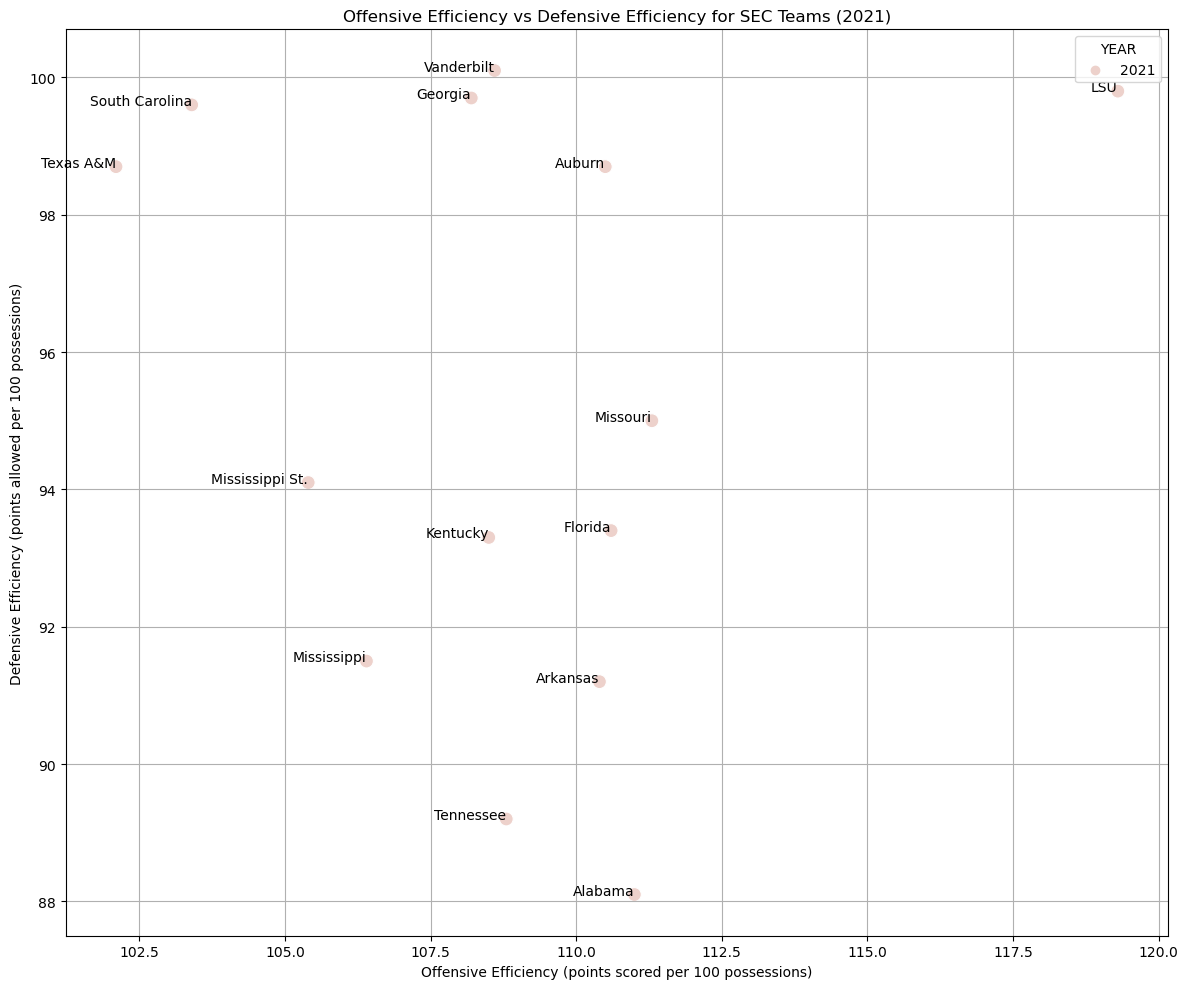

In [30]:
# Using the function to plot for SEC in 2023
plot_efficiency(df, 2023, 'SEC')

# Using the function to plot for SEC in 2022
plot_efficiency(df, 2022, 'SEC')

# Using the function to plot for SEC in 2021
plot_efficiency(df, 2021, 'SEC')


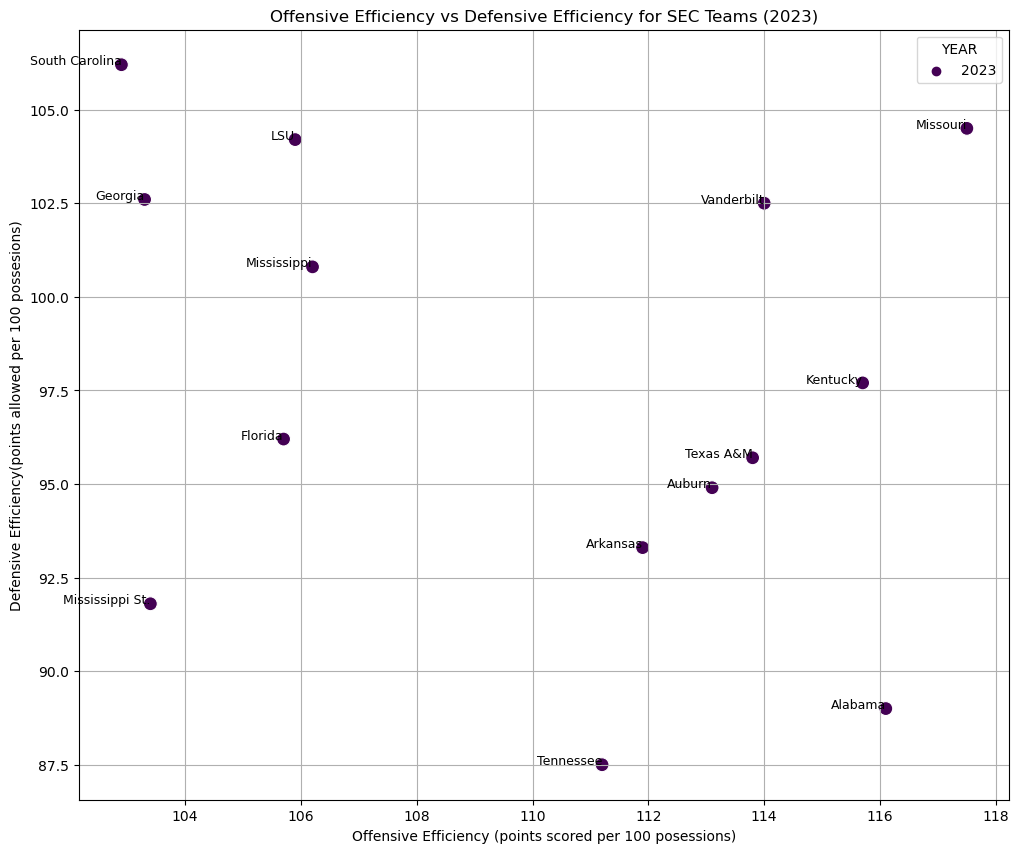

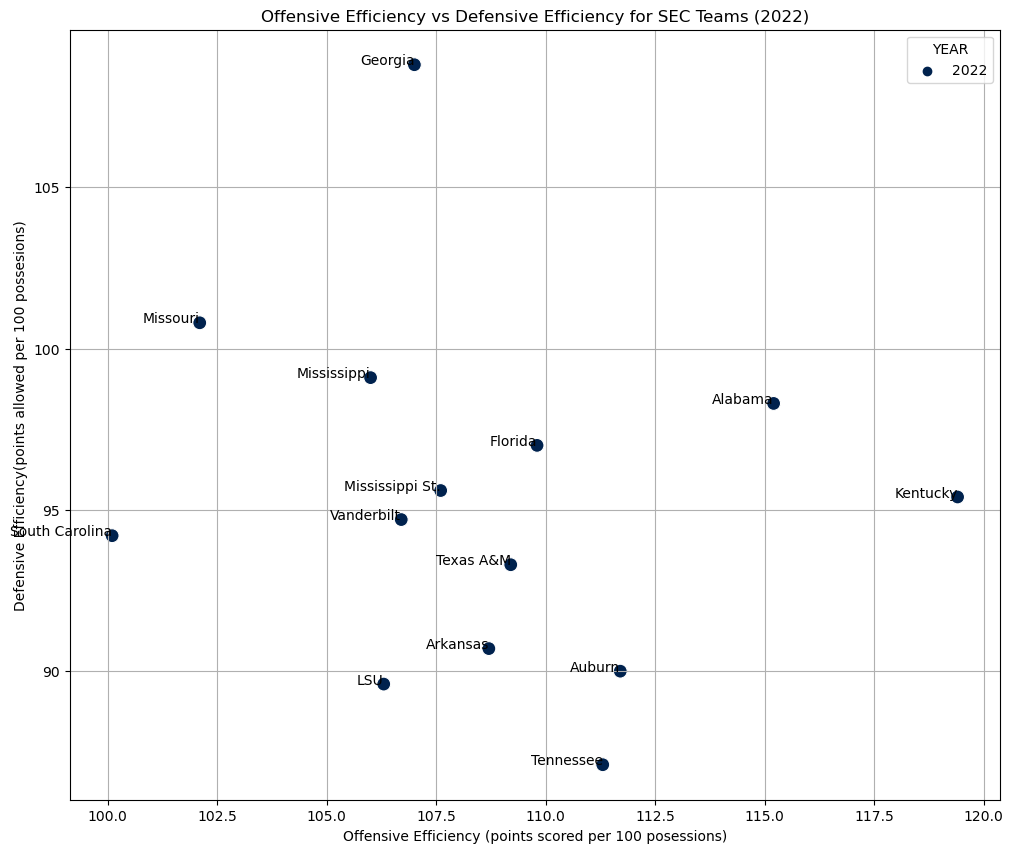

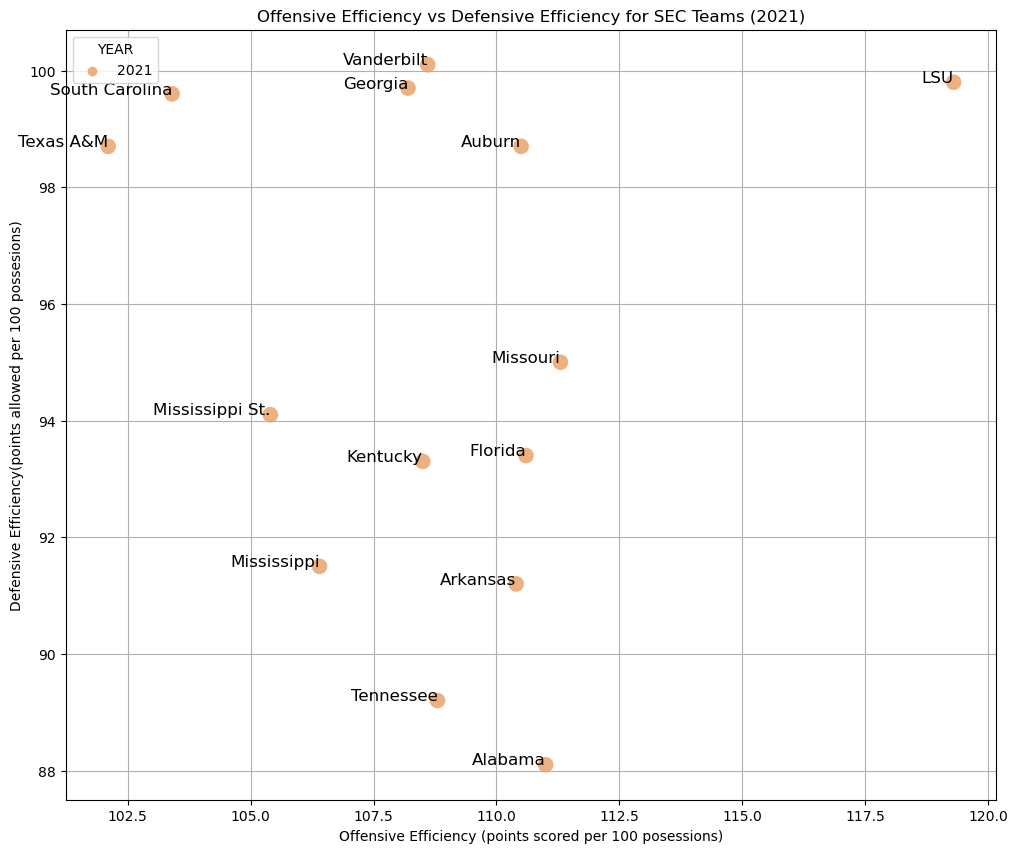

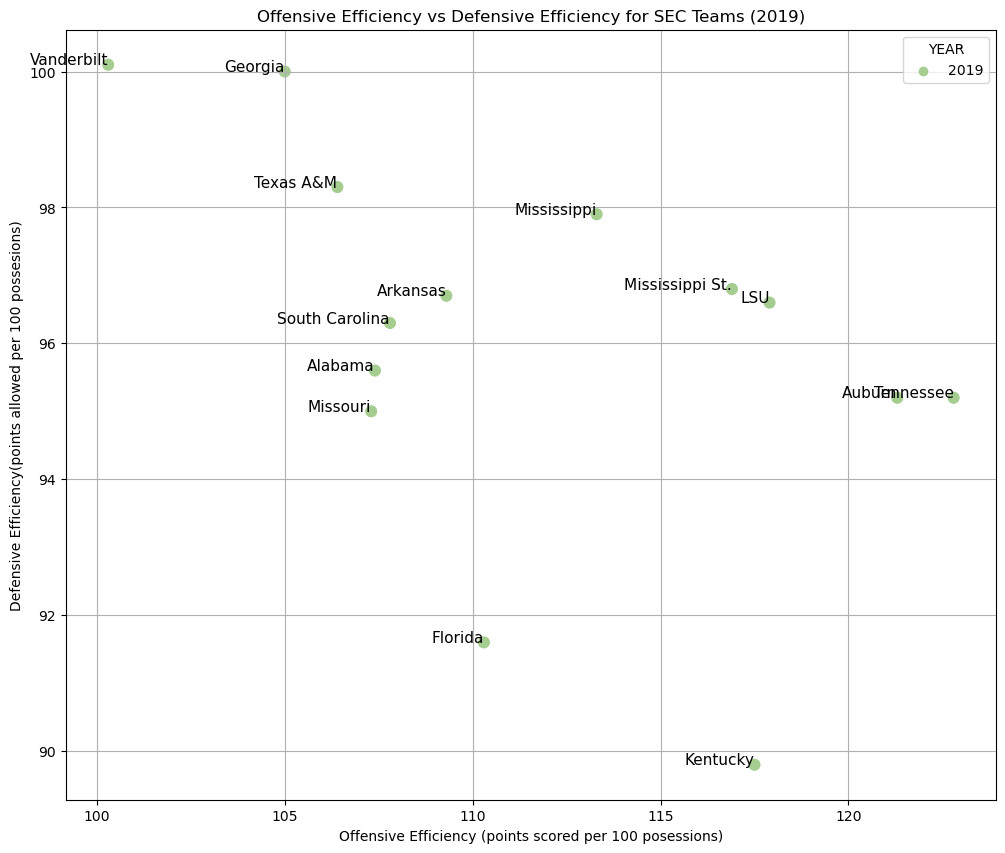

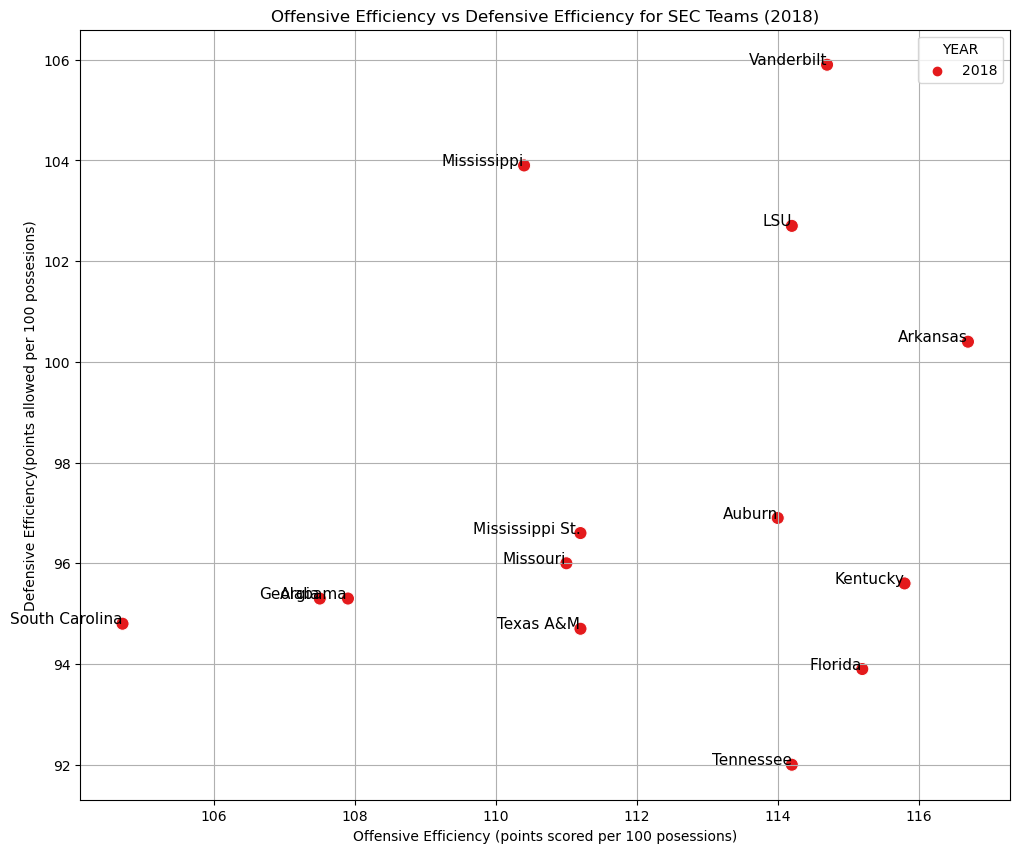

In [31]:
#offesnsive vs defensive efficiency ('ADJOE' vs 'ADJDE')

#separate each team by conference and year to analyze yearly trends 

sec = df[df['CONF'] == 'SEC']

sec_2023 = sec[sec['YEAR']==2023]
sec_2023.head(14)



plt.figure(figsize=(12,10))
sns.scatterplot(data=sec_2023, x='ADJOE', y='ADJDE', hue='YEAR', palette='viridis', s=100)

for i, team in enumerate(sec_2023['TEAM']):
    plt.text(sec_2023['ADJOE'].iloc[i], sec_2023['ADJDE'].iloc[i], team, fontsize=9, ha='right')

    
# Add labels and a title to the plot
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for SEC Teams (2023)')
plt.grid(True)
plt.show()



#last 5 years not including 2020 
sec_2022 = sec[sec['YEAR']==2022]


plt.figure(figsize=(12,10))
sns.scatterplot(data=sec_2022, x='ADJOE', y='ADJDE', hue='YEAR', palette='cividis', s=100)

for i, team in enumerate(sec_2022['TEAM']):
    plt.text(sec_2022['ADJOE'].iloc[i], sec_2022['ADJDE'].iloc[i], team, fontsize=10, ha='right')

    

plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for SEC Teams (2022)')
plt.grid(True)
plt.show()





sec_2021 = sec[sec['YEAR']==2021]


plt.figure(figsize=(12,10))
sns.scatterplot(data=sec_2021, x='ADJOE', y='ADJDE', hue='YEAR', palette='flare', s=150)

for i, team in enumerate(sec_2021['TEAM']):
    plt.text(sec_2021['ADJOE'].iloc[i], sec_2021['ADJDE'].iloc[i], team, fontsize=12, ha='right')


plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for SEC Teams (2021)')
plt.grid(True)
plt.show()





sec_2019 = sec[sec['YEAR']==2019]


plt.figure(figsize=(12,10))
sns.scatterplot(data=sec_2019, x='ADJOE', y='ADJDE', hue='YEAR', palette='crest', s=90)

for i, team in enumerate(sec_2019['TEAM']):
    plt.text(sec_2019['ADJOE'].iloc[i], sec_2019['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for SEC Teams (2019)')
plt.grid(True)
plt.show()






sec_2018 = sec[sec['YEAR']==2018]


plt.figure(figsize=(12,10))
sns.scatterplot(data=sec_2018, x='ADJOE', y='ADJDE', hue='YEAR', palette='Set1',s=90)

for i, team in enumerate(sec_2018['TEAM']):
    plt.text(sec_2018['ADJOE'].iloc[i], sec_2018['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for SEC Teams (2018)')
plt.grid(True)
plt.show()




In [ ]:
acc = df[df['CONF'] == 'ACC']

acc_2023 = acc[acc['YEAR']==2023]
acc_2023.head()



plt.figure(figsize=(12,10))
sns.scatterplot(data=acc_2023, x='ADJOE', y='ADJDE', hue='YEAR', palette='Dark2', s=80)

for i, team in enumerate(acc_2023['TEAM']):
    plt.text(acc_2023['ADJOE'].iloc[i], acc_2023['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for ACC Teams (2023)')
plt.grid(True)
plt.show()



acc_2022 = acc[acc['YEAR']==2022]
plt.figure(figsize=(12,10))
sns.scatterplot(data=acc_2022, x='ADJOE', y='ADJDE', hue='YEAR', palette='Paired', s=80)

for i, team in enumerate(acc_2022['TEAM']):
    plt.text(acc_2022['ADJOE'].iloc[i], acc_2022['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for ACC Teams (2022)')
plt.grid(True)
plt.show()






acc_2021 = acc[acc['YEAR']==2021]
plt.figure(figsize=(12,10))
sns.scatterplot(data=acc_2021, x='ADJOE', y='ADJDE', hue='YEAR', palette='Set2', s=80)

for i, team in enumerate(acc_2021['TEAM']):
    plt.text(acc_2021['ADJOE'].iloc[i], acc_2021['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for ACC Teams (2021)')
plt.grid(True)
plt.show()




acc_2019 = acc[acc['YEAR']==2019]
plt.figure(figsize=(14,12))
sns.scatterplot(data=acc_2019, x='ADJOE', y='ADJDE', hue='YEAR', palette='Accent', s=80)

for i, team in enumerate(acc_2019['TEAM']):
    plt.text(acc_2019['ADJOE'].iloc[i], acc_2019['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for ACC Teams (2019)')
plt.grid(True)
plt.show()


acc_2018 = acc[acc['YEAR']==2018]
plt.figure(figsize=(14,12))
sns.scatterplot(data=acc_2018, x='ADJOE', y='ADJDE', hue='YEAR', palette='flare', s=80)

for i, team in enumerate(acc_2018['TEAM']):
    plt.text(acc_2018['ADJOE'].iloc[i], acc_2018['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for ACC Teams (2018)')
plt.grid(True)
plt.show()

In [ ]:

pac_12 = df[df['CONF'] == 'Pac 12']

pac_12_2023 = pac_12[pac_12['YEAR']==2023]
pac_12_2023.head()



plt.figure(figsize=(12,10))
sns.scatterplot(data=pac_12_2023, x='ADJOE', y='ADJDE', hue='YEAR', palette='Dark2', s=80, alpha=0.5)

for i, team in enumerate(pac_12_2023['TEAM']):
    plt.text(pac_12_2023['ADJOE'].iloc[i], pac_12_2023['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for PAC 12 Teams (2023)')
plt.grid(True)
plt.show()








pac_12_2022 = pac_12[pac_12['YEAR']==2022]
pac_12_2022.head()



plt.figure(figsize=(12,10))
sns.scatterplot(data=pac_12_2022, x='ADJOE', y='ADJDE', hue='YEAR', palette='Dark2', s=80)

for i, team in enumerate(pac_12_2022['TEAM']):
    plt.text(pac_12_2022['ADJOE'].iloc[i], pac_12_2022['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for PAC 12 Teams (2022)')
plt.grid(True)
plt.show()







pac_12_2021 = pac_12[pac_12['YEAR']==2021]
pac_12_2021.head()



plt.figure(figsize=(12,10))
sns.scatterplot(data=pac_12_2021, x='ADJOE', y='ADJDE', hue='YEAR', palette='Dark2', s=80)

for i, team in enumerate(pac_12_2021['TEAM']):
    plt.text(pac_12_2021['ADJOE'].iloc[i], pac_12_2021['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for PAC 12 Teams (2021)')
plt.grid(True)
plt.show()







pac_12_2019 = pac_12[pac_12['YEAR']==2019]
pac_12_2019.head()



plt.figure(figsize=(12,10))
sns.scatterplot(data=pac_12_2019, x='ADJOE', y='ADJDE', hue='YEAR', palette='Dark2', s=80)

for i, team in enumerate(pac_12_2019['TEAM']):
    plt.text(pac_12_2019['ADJOE'].iloc[i], pac_12_2019['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for PAC 12 Teams (2019)')
plt.grid(True)
plt.show()





pac_12_2018 = pac_12[pac_12['YEAR']==2018]
pac_12_2018.head()



plt.figure(figsize=(12,10))
sns.scatterplot(data=pac_12_2018, x='ADJOE', y='ADJDE', hue='YEAR', palette='Dark2', s=80)

for i, team in enumerate(pac_12_2018['TEAM']):
    plt.text(pac_12_2018['ADJOE'].iloc[i], pac_12_2018['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for PAC 12 Teams (2018)')
plt.grid(True)
plt.show()

In [ ]:
big_ten=df[df['CONF']=="Big Ten"]


big_ten_2023 = big_ten[big_ten['YEAR']==2023]


plt.figure(figsize=(12,10))
sns.scatterplot(data=big_ten_2023, x='ADJOE', y='ADJDE', hue='YEAR', palette='plasma', s=80, alpha=0.5)

for i, team in enumerate(big_ten_2023['TEAM']):
    plt.text(big_ten_2023['ADJOE'].iloc[i], big_ten_2023['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big Ten Teams (2023)')
plt.grid(True)
plt.show()





big_ten_2022 = big_ten[big_ten['YEAR']==2022]


plt.figure(figsize=(12,10))
sns.scatterplot(data=big_ten_2022, x='ADJOE', y='ADJDE', hue='YEAR', palette='Set1', s=80, alpha=0.5)

for i, team in enumerate(big_ten_2022['TEAM']):
    plt.text(big_ten_2022['ADJOE'].iloc[i], big_ten_2022['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big Ten Teams (2022)')
plt.grid(True)
plt.show()




big_ten_2021 = big_ten[big_ten['YEAR']==2021]


plt.figure(figsize=(12,10))
sns.scatterplot(data=big_ten_2021, x='ADJOE', y='ADJDE', hue='YEAR', palette='rocket', s=80, alpha=0.5)

for i, team in enumerate(big_ten_2021['TEAM']):
    plt.text(big_ten_2021['ADJOE'].iloc[i], big_ten_2021['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big Ten Teams (2021)')
plt.grid(True)
plt.show()







big_ten_2019 = big_ten[big_ten['YEAR']==2019]


plt.figure(figsize=(12,10))
sns.scatterplot(data=big_ten_2019, x='ADJOE', y='ADJDE', hue='YEAR', palette='Set1', s=80, alpha=0.5)

for i, team in enumerate(big_ten_2019['TEAM']):
    plt.text(big_ten_2019['ADJOE'].iloc[i], big_ten_2019['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big Ten Teams (2019)')
plt.grid(True)
plt.show()




big_ten_2018 = big_ten[big_ten['YEAR']==2018]


plt.figure(figsize=(12,10))
sns.scatterplot(data=big_ten_2018, x='ADJOE', y='ADJDE', hue='YEAR', palette='Set1', s=80, alpha=0.5)

for i, team in enumerate(big_ten_2018['TEAM']):
    plt.text(big_ten_2018['ADJOE'].iloc[i], big_ten_2018['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big Ten Teams (2022)')
plt.grid(True)
plt.show()

In [ ]:
big_12=df[df['CONF']=="Big 12"]


big_12_2023 = big_12[big_12['YEAR']==2023]


plt.figure(figsize=(12,10))
sns.scatterplot(data=big_12_2023, x='ADJOE', y='ADJDE', hue='YEAR', palette='plasma', s=80)

for i, team in enumerate(big_12_2023['TEAM']):
    plt.text(big_12_2023['ADJOE'].iloc[i], big_12_2023['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big 12 Teams (2023)')
plt.grid(True)
plt.show()




big_12_2022 = big_12[big_12['YEAR']==2022]

plt.figure(figsize=(12,10))
sns.scatterplot(data=big_12_2022, x='ADJOE', y='ADJDE', hue='YEAR', palette='plasma', s=80)

for i, team in enumerate(big_12_2022['TEAM']):
    plt.text(big_12_2022['ADJOE'].iloc[i], big_12_2022['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big 12 Teams (2022)')
plt.grid(True)
plt.show()




big_12_2021 = big_12[big_12['YEAR']==2021]

plt.figure(figsize=(12,10))
sns.scatterplot(data=big_12_2021, x='ADJOE', y='ADJDE', hue='YEAR', palette='plasma', s=80)

for i, team in enumerate(big_12_2021['TEAM']):
    plt.text(big_12_2021['ADJOE'].iloc[i], big_12_2021['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big 12 Teams (2021)')
plt.grid(True)
plt.show()





big_12_2019 = big_12[big_12['YEAR']==2019]

plt.figure(figsize=(12,10))
sns.scatterplot(data=big_12_2019, x='ADJOE', y='ADJDE', hue='YEAR', palette='plasma', s=80)

for i, team in enumerate(big_12_2019['TEAM']):
    plt.text(big_12_2019['ADJOE'].iloc[i], big_12_2019['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big 12 Teams (2019)')
plt.grid(True)
plt.show()



big_12_2018 = big_12[big_12['YEAR']==2018]

plt.figure(figsize=(12,10))
sns.scatterplot(data=big_12_2018, x='ADJOE', y='ADJDE', hue='YEAR', palette='plasma', s=80)

for i, team in enumerate(big_12_2018['TEAM']):
    plt.text(big_12_2018['ADJOE'].iloc[i], big_12_2018['ADJDE'].iloc[i], team, fontsize=11, ha='right')

    
plt.xlabel('Offensive Efficiency (points scored per 100 posessions)')
plt.ylabel('Defensive Efficiency(points allowed per 100 possesions)')
plt.title('Offensive Efficiency vs Defensive Efficiency for Big 12 Teams (2018)')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tournament_appearances(df, conference, palette="viridis"):
    """
    Plot number of NCAA Tournament appearances for a given conference.

    Parameters:
    - df: DataFrame containing the data.
    - conference: Name of the conference.
    - palette: Color palette for the visualization. Default is "viridis".
    """
    conf_data = df[df['CONF'] == conference]
    tournament_data = conf_data[conf_data['SEED'] != 'Did not qualify']
    tourn_count = tournament_data.groupby('TEAM')['YEAR'].count().reset_index()
    tourn_sorted = tourn_count.sort_values(by='YEAR', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(data=tourn_sorted, x='TEAM', y='YEAR', palette=palette, order=tourn_sorted['TEAM'])
    plt.xlabel('Team')
    plt.ylabel('Number of NCAA Tournament Appearances')
    plt.title(f'Number of NCAA Tournament Appearances for {conference} Teams(2013-19, 2021-23)')
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()


In [ ]:
conferences = ["SEC", "ACC", "PAC 12", "Big Ten", "Big 12", "SWAC", "Atlantic 10"]

for conf in conferences:
    plot_tournament_appearances(df, conf)


In [ ]:
#number of ncaa appearances filtered by conference 2013-2019, 2021-23

sec_tourn = sec[sec['SEED'] != 'Did not qualify'].groupby('TEAM')['YEAR'].count().reset_index()
sec_tourn = sec_tourn.sort_values(by='YEAR', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=sec_tourn, x='TEAM', y='YEAR', palette='viridis', order=sec_tourn['TEAM'])
plt.xlabel('Team')
plt.ylabel('Number of NCAA Tournament Appearances')
plt.title('Number of NCAA Tournament Appearances for SEC Teams(2013-19, 2021-23)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()



acc_tourn = acc[acc['SEED'] != 'Did not qualify'].groupby('TEAM')['YEAR'].count().reset_index()
acc_tourn = acc_tourn.sort_values(by='YEAR', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=acc_tourn, x='TEAM', y='YEAR', palette='inferno', order=acc_tourn['TEAM'])
plt.xlabel('Team')
plt.ylabel('Number of NCAA Tournament Appearances')
plt.title('Number of NCAA Tournament Appearances for ACC Teams(2013-19, 2021-23)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


pac_12_tourn = pac_12[pac_12['SEED'] != 'Did not qualify'].groupby('TEAM')['YEAR'].count().reset_index()
pac_12_tourn = pac_12_tourn.sort_values(by='YEAR', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=pac_12_tourn, x='TEAM', y='YEAR', palette='cividis', order=pac_12_tourn['TEAM'])
plt.xlabel('Team')
plt.ylabel('Number of NCAA Tournament Appearances')
plt.title('Number of NCAA Tournament Appearances for PAC 12 Teams(2013-19, 2021-23)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()




big_ten_tourn = big_ten[big_ten['SEED'] != 'Did not qualify'].groupby('TEAM')['YEAR'].count().reset_index()
big_ten_tourn = big_ten_tourn.sort_values(by='YEAR', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=big_ten_tourn, x='TEAM', y='YEAR', palette='mako', order=big_ten_tourn['TEAM'])
plt.xlabel('Team')
plt.ylabel('Number of NCAA Tournament Appearances')
plt.title('Number of NCAA Tournament Appearances for Big Ten Teams(2013-19, 2021-23)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()



big_12_tourn = big_12[big_12['SEED'] != 'Did not qualify'].groupby('TEAM')['YEAR'].count().reset_index()
big_12_tourn = big_12_tourn.sort_values(by='YEAR', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=big_12_tourn, x='TEAM', y='YEAR', palette='cividis', order=big_12_tourn['TEAM'])
plt.xlabel('Team')
plt.ylabel('Number of NCAA Tournament Appearances')
plt.title('Number of NCAA Tournament Appearances for Big 12 Teams(2013-19, 2021-23)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()






swac_tourn = swac[swac['SEED'] != 'Did not qualify'].groupby('TEAM')['YEAR'].count().reset_index()
swac_tourn = swac_tourn.sort_values(by='YEAR', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=swac_tourn, x='TEAM', y='YEAR', palette='Dark2', order=swac_tourn['TEAM'])
plt.xlabel('Team')
plt.ylabel('Number of NCAA Tournament Appearances')
plt.title('Number of NCAA Tournament Appearances for SWAC Teams(2013-19, 2021-23)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()



atl_ten = df[df['CONF']=='Atlantic 10']
asun = df[df['CONF'] == 'Atlantic Sun']
amer_east=df[df['CONF'] == 'America East']



atl_ten_tourn = atl_ten[atl_ten['SEED'] != 'Did not qualify'].groupby('TEAM')['YEAR'].count().reset_index()
atl_ten_tourn = atl_ten_tourn.sort_values(by='YEAR', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=atl_ten_tourn, x='TEAM', y='YEAR', palette='mako', order=atl_ten_tourn['TEAM'])
plt.xlabel('Team')
plt.ylabel('Number of NCAA Tournament Appearances')
plt.title('Number of NCAA Tournament Appearances for Atlantic Ten Teams(2013-19, 2021-23)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [ ]:
#correlation heatmap --> correlation between all vairables 

df_correlation = df.corr()

plt.figure(figsize=(20,15))

sns.heatmap(data=df_correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap", fontsize=20)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#select features and target
features = ['G', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 
            'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB']
target = 'W'

# Split into training and testing
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat = linreg.predict(X_test)

# Calculate MSE and R squared
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print('Mean Squared Error:', mse)
print('R-Squared:', r2)


In [ ]:
# Calculate residuals
residuals = y_test - y_hat

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

#Plot Residuals
sns.residplot(x=y_hat, y=residuals, lowess=True, ax=axs[0], line_kws={'color': 'red', 'lw': 1})
axs[0].set_title('Residuals Plot')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Residuals')

# Prediction Error Plot
sns.scatterplot(x=y_test, y=y_hat, ax=axs[1])
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)  # identity line
axs[1].set_title('Prediction Error Plot')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


# Add wins to feature
features_rf = ['G', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 
               'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'W']

# Encode the CONF column 
one_hot_encoded_conf = pd.get_dummies(df['CONF'], prefix='CONF')

# Concatenating the one-hot encoded CONF column with the other features
X_rf = pd.concat([df[features_rf], one_hot_encoded_conf], axis=1)

# make postseason success binary (1: Qualified, 0: Did not qualify)
label_encoder = LabelEncoder()
y_rf = label_encoder.fit_transform(df['POSTSEASON'].apply(lambda x: 'Qualified' if x != 'Did not qualify' else 'Did not qualify'))


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict postseason success on the testing set
y_hat_rf = rf_model.predict(X_test_rf)


accuracy_rf = accuracy_score(y_test_rf, y_hat_rf)
conf_matrix = confusion_matrix(y_test_rf, y_hat_rf)
class_report = classification_report(y_test_rf, y_hat_rf)

print('Accuracy Score:', accuracy_rf)
print('Confusion Matrix:', conf_matrix)
print('Classification Report:', class_report)




In [24]:
# Update the target variable with WAB feature
y_rf_new = (df['WAB'] > 0).astype(int)

# remove WAB from feature list
features_rf_new = ['G', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 
                   'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'W']
X_rf_new = pd.concat([df[features_rf_new], one_hot_encoded_conf], axis=1)


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_rf_new, y_rf_new, test_size=0.2, random_state=42)

rf_model_new = RandomForestClassifier(random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# Predict postseason success on the testing set
y_hat_new = rf_model_new.predict(X_test_new)


accuracy_rf_new = accuracy_score(y_test_new, y_hat_new)
conf_matrix_rf_new = confusion_matrix(y_test_new, y_hat_new)
class_report_new = classification_report(y_test_new, y_hat_new)

print('\nFor the new model:')
print('Accuracy Score:', accuracy_rf_new)
print('Confusion Matrix:', conf_matrix_rf_new)
# print('Classification Report:', class_report_new)



For the new model:
Accuracy Score: 0.9517730496453901
Confusion Matrix: [[584  12]
 [ 22  87]]


In [25]:

# Create a DataFrame from the confusion matrix array
conf_matrix_df = pd.DataFrame(
    conf_matrix_rf_new, 
    columns=['Predicted Not Qualified', 'Predicted Qualified'],
    index=['Actual Not Qualified', 'Actual Qualified']
)

print(conf_matrix_df)


                      Predicted Not Qualified  Predicted Qualified
Actual Not Qualified                      584                   12
Actual Qualified                           22                   87
